<a href="https://colab.research.google.com/github/marcosalinas777/bankchurnrate/blob/main/bank_customer_churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  #read data with pandas library
import numpy as np
import matplotlib.pyplot as plt  # iport matplotlib for visualization
from sklearn.model_selection import train_test_split  #sklearn helps split into train and test set and build classifiers to evaluate them
from sklearn.ensemble import RandomForestClassifier   #this part helps us to build the classifier of randomforrestclassifer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   #this is helpinhg us interepret the classification results
from sklearn import metrics
from sklearn.linear_model import LogisticRegression  #second classifier we will use
import seaborn as sb  #seaborn helps us to do visualizations

#find the customer retention rate, understand how many people will not be using our services anymore
#estimate how many customers will stay with us so we can see how many money we will have avialble
#a Bank has loads of data so we will use it to make a prediction
#reading data, explora, visualiza, process data, split the data, build the classifiers and do the evaluation

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/bianca jordan data science/Churn_Modelling.csv')

In [ ]:
data.head()
#has 14 columns ou features
#we will see which of the 14 we want to use for the model

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape
#data set has 10000 rows and 14 columns

(10000, 14)

In [ ]:
data.describe()
#gives us statistics that will help us in the analysis

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()
#tells us we have full data set, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#definition of the proble: refer to the origial question of what you want to solve!
#what are we trying to solve, what is the % of people that will churn from this bank?
#lets do data exploration with that in mind
#see which variables will help to solve the problem


In [ ]:
#eliminate columns that will not help us to predict, like row, surname, customerid

In [ ]:
update_data=data.drop(['RowNumber','Surname','CustomerId'],axis=1)
#we create a new variable by dropping the above columns

In [ ]:
update_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#now we have 11 columns

In [ ]:
#geography and gender are categorical, numerical values are easier to work in Machine Learning, so lets transform them to numbers

In [ ]:
update_data=update_data.drop(['Geography','Gender'], axis=1)
#we need to transform geography and gender to numbers to be able to predict

In [ ]:
update_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
Geography=pd.get_dummies(data.Geography) #we dropped them but we have them separate and we will transform them to numerical values
Gender=pd.get_dummies(data.Gender)

In [ ]:
Geography  #for every person now we know where they're from
#geography was dropped but now we have them separately

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
Gender #for every person now we know where thir gender
#gender was dropped but now we have them separately

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
9995,False,True
9996,False,True
9997,True,False
9998,False,True


In [ ]:
#now we will concatenate the geography and gender values to the above dataset so we can do the predictions

In [ ]:
update_data=pd.concat([update_data,Geography,Gender],axis=1)

In [ ]:
update_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [ ]:
update_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [ ]:
churned=update_data[update_data['Exited']==1]['Exited'].count()
#tells us how many people have churned using the update data, by counting the exited column

In [ ]:
not_churned=update_data[update_data['Exited']==0]['Exited'].count()
#tells us how many people have not churned using the update data, by counting the exited column that are =0 which means they didnt exit

In [ ]:
print('Nuber of people that churned:', churned)
print('Number of people that did not churned', not_churned)

Nuber of people that churned: 2037
Number of people that did not churned 7963


In [ ]:
#lets make a visualizations

In [ ]:
labels=[0,1]
#what have churned and have not churned

<BarContainer object of 1 artists>

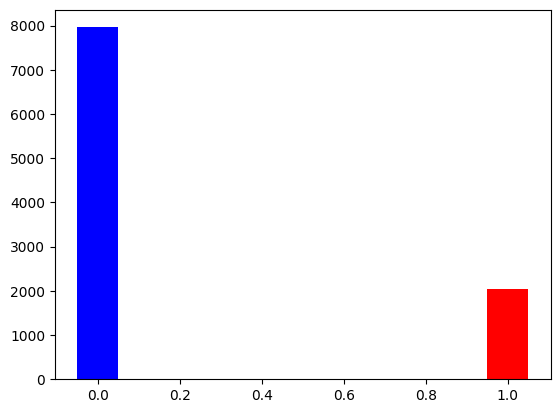

In [ ]:
plt.bar(labels[1], churned, width=0.1, color='red')
plt.bar(labels[0], not_churned, width=0.1, color='blue')


In [ ]:
# we can see that 20% churned and around 80% didnt
#looks like our data is unbalanced
# find our if gender and geography have any correlation

In [ ]:
#find if gender and geography has correlation

In [ ]:
nr_male=data[data['Gender']=='Male']['Gender'].count()

In [ ]:
nr_female=data[data['Gender']=='Female']['Gender'].count()

In [ ]:
print(nr_male, nr_female)
#counts how many males and females are in our dataset

5457 4543


In [ ]:
#lets make a visualization

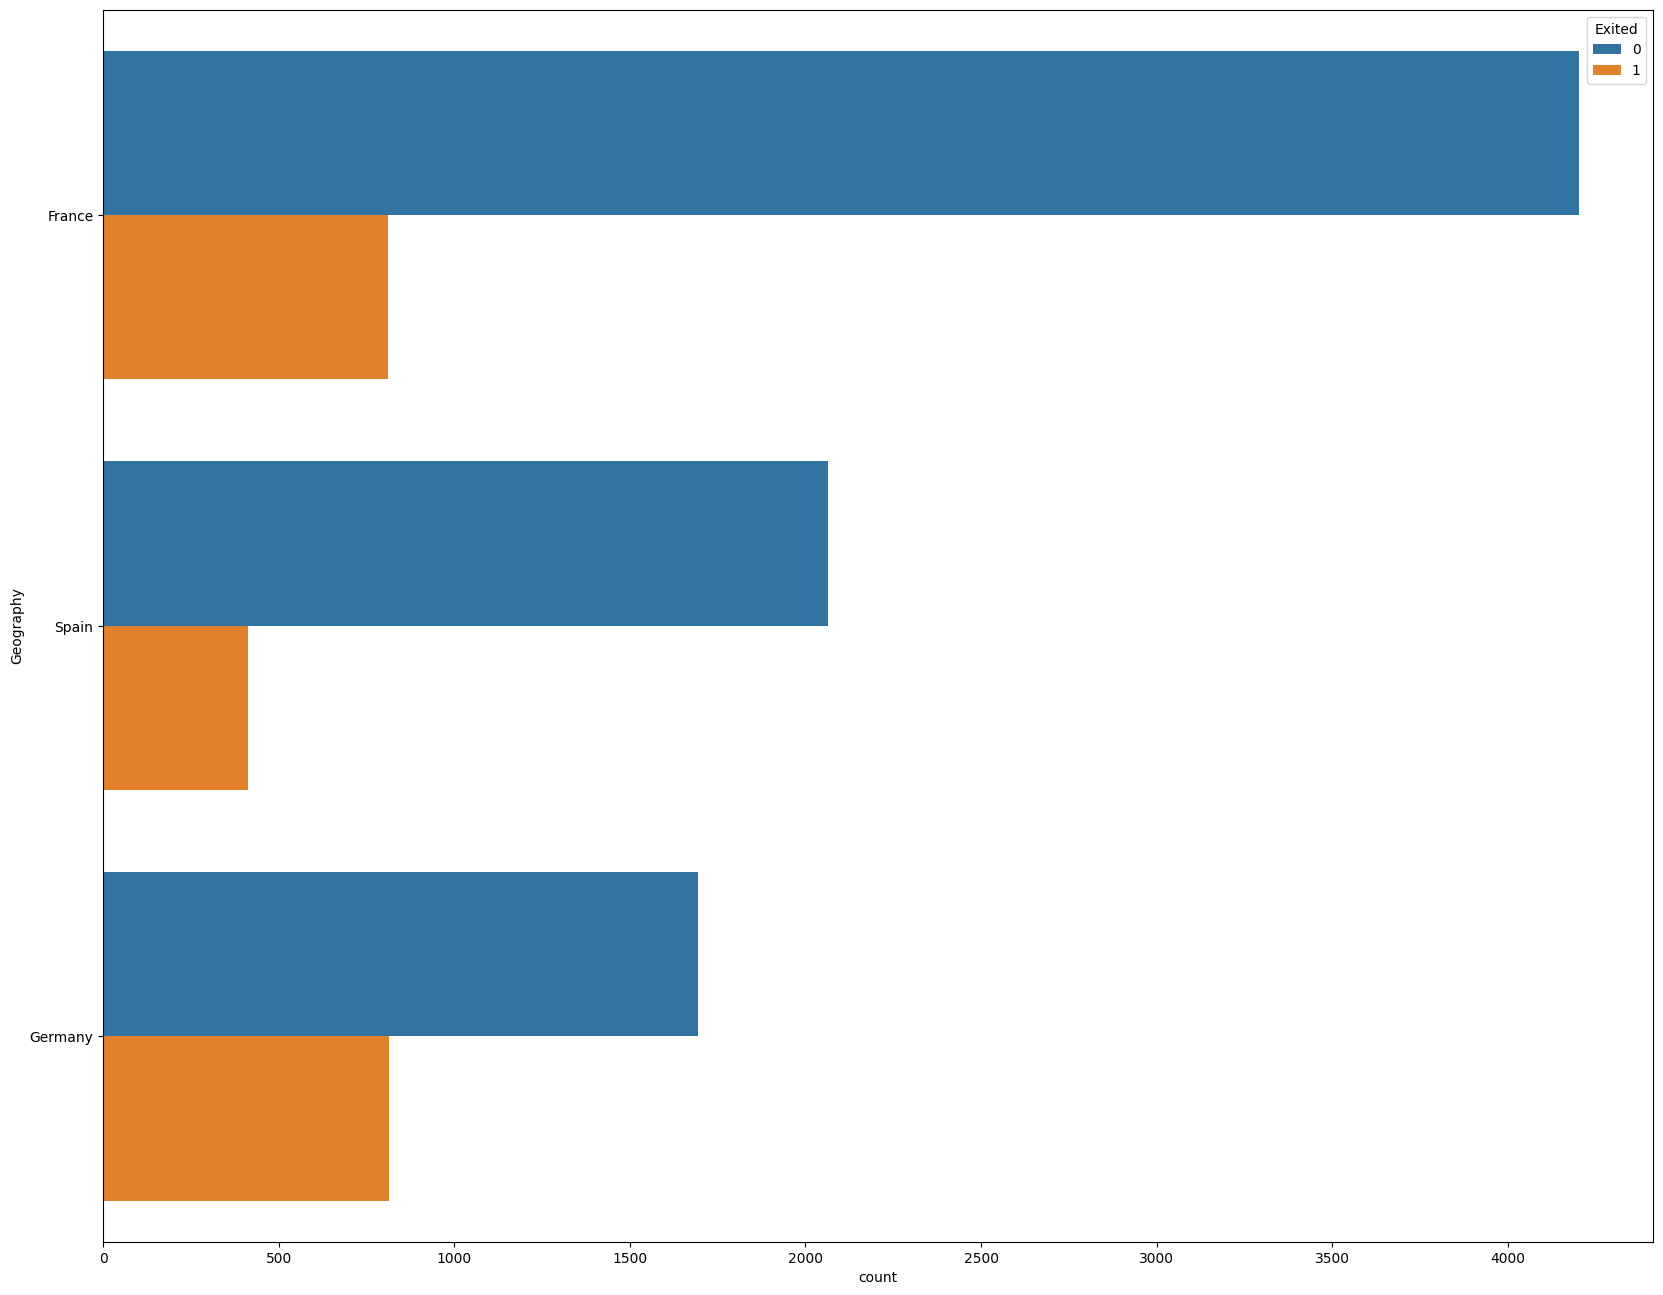

In [ ]:
fig, aix=plt.subplots(figsize=(20,16))
aix=sb.countplot(hue='Exited', y='Geography', data=data)
#create visualization to see how many people have exited from the different people, orange = exited, blue = not exited
#we need to keep this in mind when doing classifications

In [ ]:
age_customer=np.array(update_data['Age'])
#create new variable lists of age of customers

<ipython-input-53-3f2649e661fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis=sb.distplot(age_customer,kde=False, bins=200)


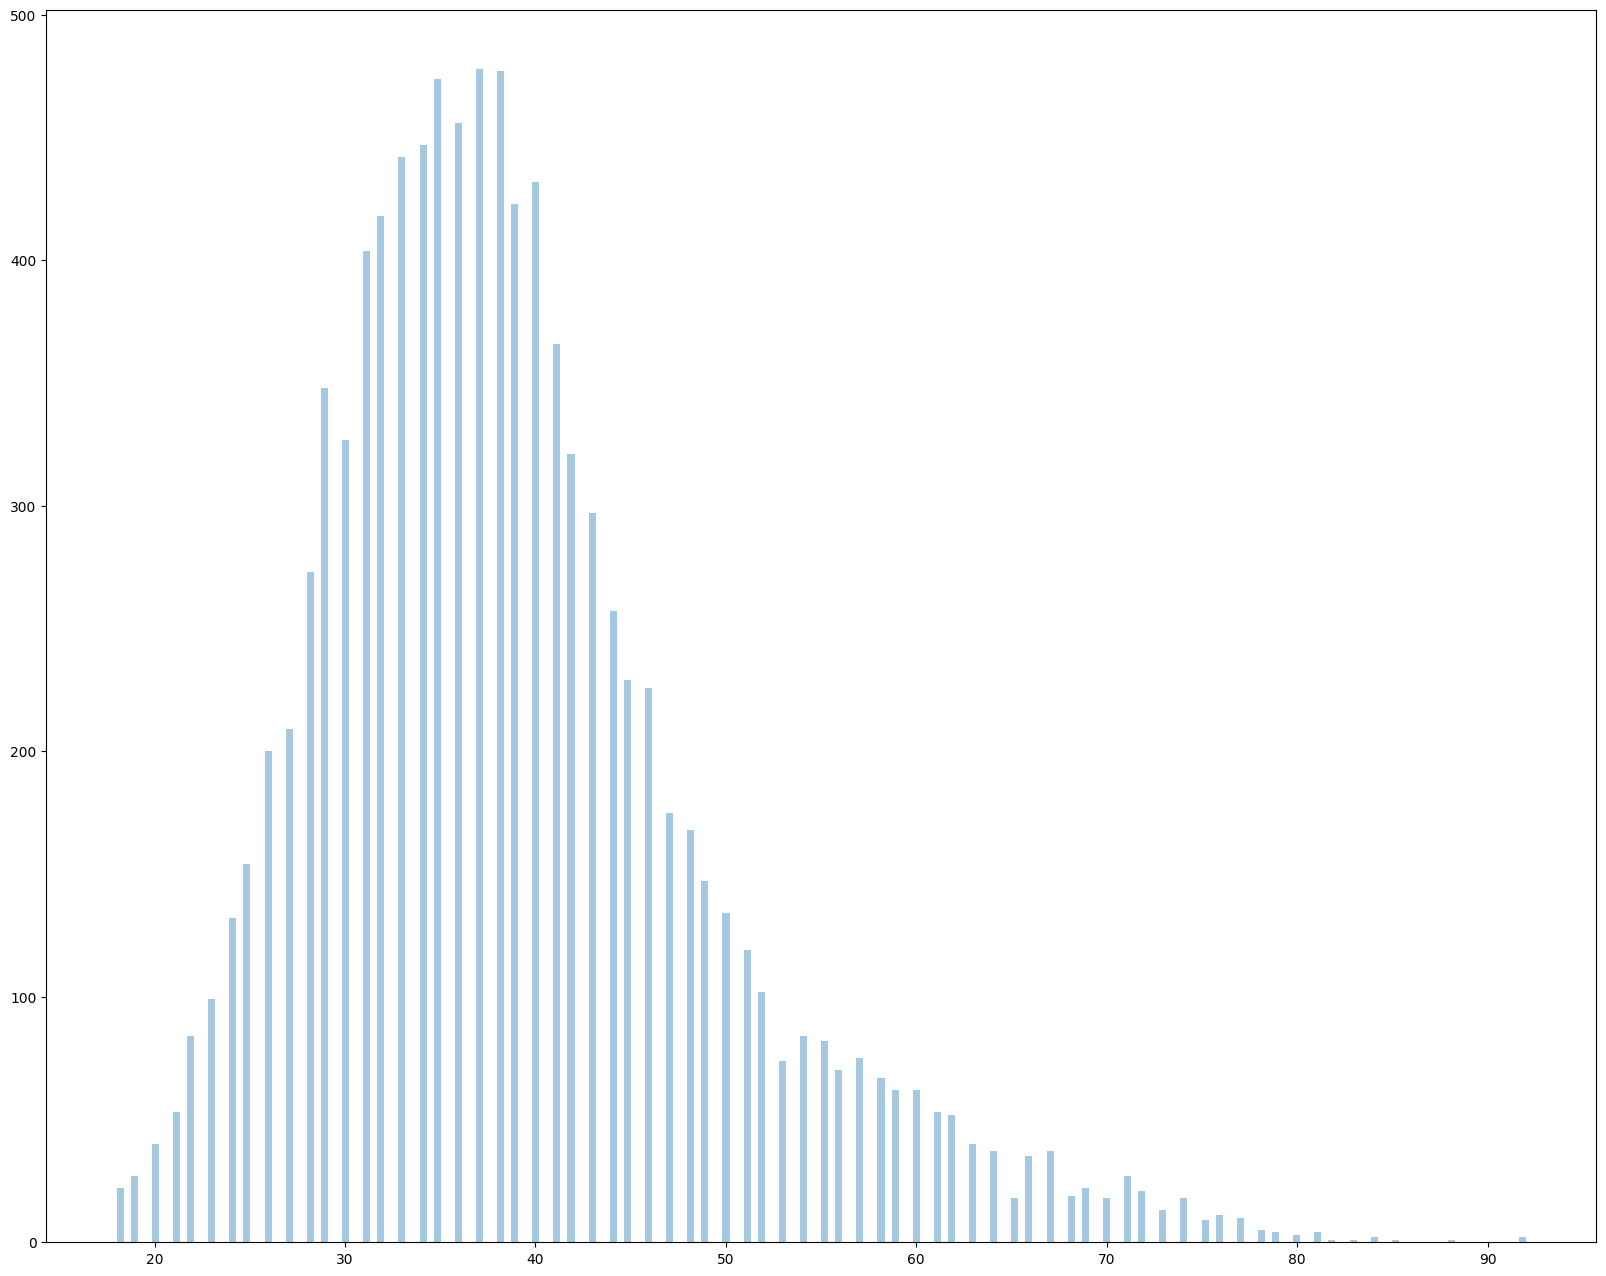

In [ ]:
figure, axis = plt.subplots(figsize=(20,16))
axis=sb.distplot(age_customer,kde=False, bins=200)
#visualizing as a histogram the frequency of age groups
#our main customers are betwen 30 and 50 years old, important to keep this in mind

In [ ]:
#you can see our main customers that stay with us are in the age between 20 and 50 years old


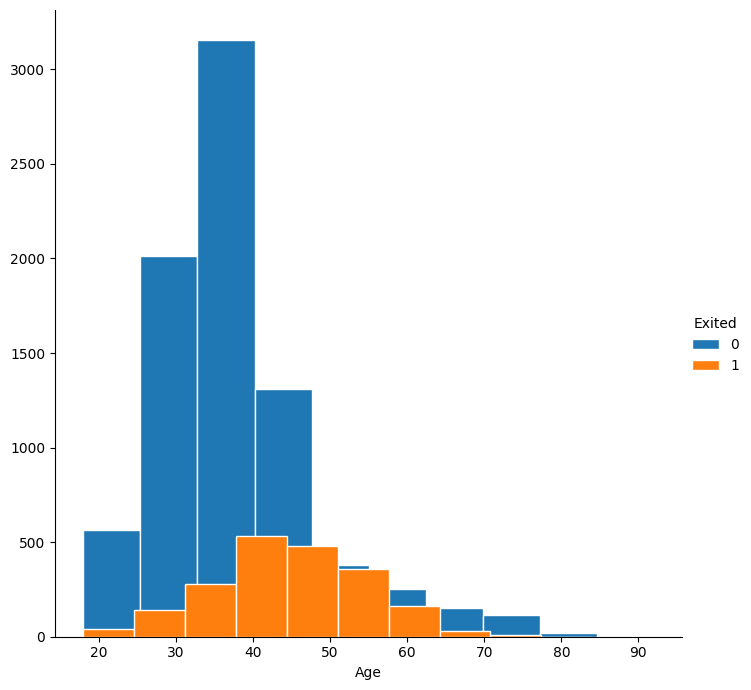

In [ ]:
new_plot=sb.FacetGrid(update_data, hue='Exited', height=7)
(new_plot.map(plt.hist,'Age',edgecolor='w').add_legend())
#how many people have churned based on their age
#you can see that more people in their 40s 50s and 60s have left our company
#this info is good to keep in mind for when we build the classifier


In [ ]:
#exited = blue
#orange = age a lot people in 40 50 and 60s left our company

In [ ]:
#lets build a classifier to predict how many people will churn
# we want to find out how many people have left, exited column

In [ ]:
X = update_data.drop(['Exited'],axis=1)
y = update_data['Exited']
#before building the classifier we need to select the featue we want to predict, we want to find out how many peple have exited, that is the Exited column
#basically we have selected the data we want to predict (y)



In [ ]:
print(y)  #the 1 and 0 tells us if the customer has churned

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
#next step is to split data into train and data set, we do this with the help of sklearn library

In [ ]:
X_train, X_test, y_train, y_test=  train_test_split(X,y, test_size = 0.2, random_state = 42)
#random state is 42 because it will take random bits and pieces from teh data to make sure that our model is trained properly

In [ ]:
#now build the classifier, first my creating another variable called classifier

In [ ]:
classifier= RandomForestClassifier(n_estimators=100, random_state=42) #frst randomforrestcalssifier because that's the first algorythm we will use we give it n estimators and a random state of 42
classifier.fit(X_train, y_train) #now fit classifers in train sets
predictions=classifier.predict(X_test) #create another variable called predictions

In [ ]:
print(classification_report(y_test, predictions))  #after having the classifers we can print the prediction scores
print(accuracy_score(y_test, predictions))  #we have accuracy score of 87%, we can do a parameter tuning

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

0.865


In [ ]:
# we got an accuracy score of almost 87%

In [ ]:
#now we will build another classifier called logistic regression is part of sklearn

In [ ]:
logistic_regression =LogisticRegression(random_state=42)  #random state of 42
logistic_regression.fit(X_train, y_train)  #fit it again in train sets
y_predict=logistic_regression.predict(X_test) # y predict is the prediction variable

In [ ]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
#results of classifiers
#print accuracy score of ytest and ypredict
#lets see if the logisticregression did better than the randomforrest classifier

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

0.8005


In [ ]:
#for the logistic regression we have an accuracy of 80%
#which tells us that the random forest classifier has done better than the logistic regression

In [ ]:
# before we dove in data we needed to see what we wanted to figure, how many people will church, basically what we were tring to fix
#we tried to figure out how many people and what is % of people that have churned or are going to churn from our bank
#and then we use our intuition to figure out which would be the variables that would be the most important for our analysis and after that we dropped some of the columns we didnt need then we cleaned our data
#after we cleaned our data and doing some data processing we built the classifiers, which is the creation part
#we created and gotten the resultsof our classifiers
# why is it important to predict churn? basically the longer a customer stays with you the more money you will make,
#the loger a customer stays with you the momre you learn about them like customer spending habts and you also learn about your own company
#you also learn about your own products, like what accounts do well and which do not, what ages are more important to invest in marketing, what age is a waste to invest in marketing?
#there are answers to these questions you just need the right data
#data is a science